In [1]:
import torch
import numpy as np 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pylab as plt
import dataset
import model
import pickle
import trainers
import cv2
import os
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
data_dir = '/scratch/gilbreth/ahmedb/CelebA'
celeb_data = dataset.CelebA(data_dir, download=False, split='train')
loader = celeb_data.load_data(batch_size=64, shuffle=True)
data = next(iter(loader))

In [3]:
data[0].shape

torch.Size([64, 3, 128, 128])

In [4]:
vae = model.CAE()
results_dir = '/scratch/gilbreth/ahmedb/vae/saved_results'
trainer = trainers.VAE_trainer(vae,results_dir)

In [5]:
import os
chkpoint = "CAE_checkpoint_epochs_040.pt"
filename = os.path.join(results_dir, chkpoint)
trainer.load_checkpoint(filename)

40

In [6]:
inpt = data[0].to(device)
output,_,_ = trainer.model(inpt)

In [7]:
output = output.detach().cpu()
output.shape

torch.Size([64, 3, 128, 128])

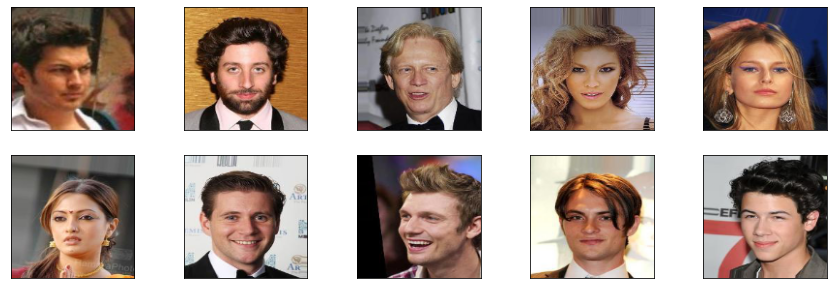

In [9]:
inp = data[0].detach().cpu()
fig = plt.figure(figsize=(15,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(torch.transpose(torch.transpose(inp[i],0,2),0,1))

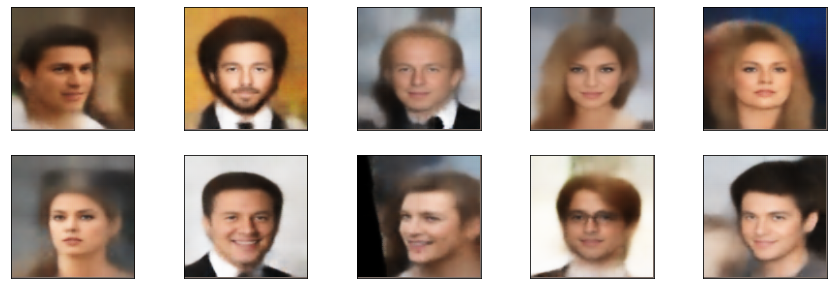

In [8]:
fig = plt.figure(figsize=(15,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(torch.transpose(torch.transpose(output[i],0,2),0,1))
# fig = plt.figure(figsize=(15,5))
# plt.imshow(torch.transpose(torch.transpose(output[0],0,2),0,1))

In [71]:
src = data[0][0].numpy().transpose(1,2,0)
modified = cv2.resize(src, (128,128))


In [72]:
modified.shape

(128, 128, 3)

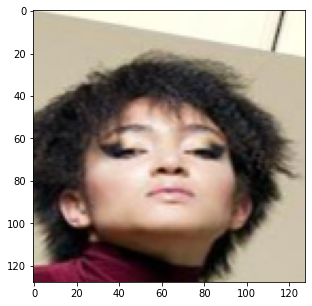

In [73]:
fig = plt.figure(figsize=(15,5))
plt.imshow(modified)

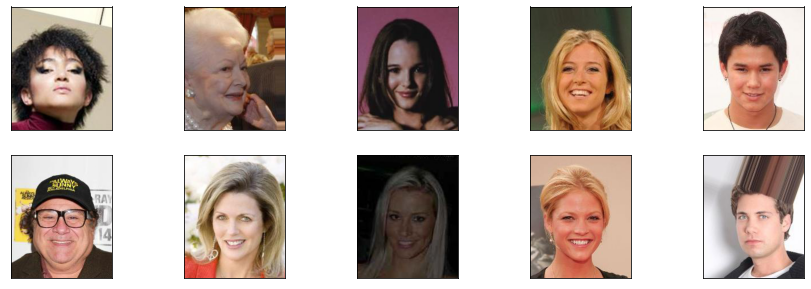

In [39]:
fig = plt.figure(figsize=(15,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(torch.transpose(torch.transpose(data[0][i],0,2),0,1))
    # ax.set_title(data[1][i].item())

In [3]:
data_dir = '/scratch/gilbreth/ahmedb/FashionMNIST'
results_dir = '/scratch/gilbreth/ahmedb/vae/saved_results'
train_data = dataset.fashionMNIST(data_dir, download=False, train=True)
test_data = dataset.fashionMNIST(data_dir, download=False, train=False)
loader = train_data.load_data(batch_size=64, shuffle=True)
data = next(iter(loader))
test_loader = test_data.load_data(batch_size=64, shuffle=True)
test_data = next(iter(test_loader))


In [4]:
filename='autencoder_loss_history.pickle'
with open(os.path.join(results_dir, filename),'rb') as f:
    ret_loss = pickle.load(f)

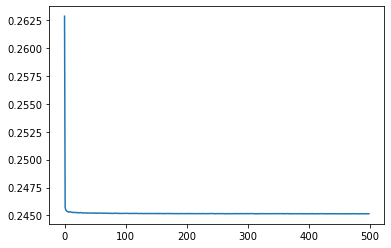

In [5]:
plt.plot(ret_loss)

In [6]:
train_data = dataset.fashionMNIST(data_dir, download=False, train=True)
train_loader = train_data.load_data(batch_size=64, shuffle=True)
vae = model.CAE(device)

trainer = trainers.VAE_trainer(vae, device,results_dir)

In [7]:
trainer.load_checkpoint()

500

In [9]:
data = torch.randn(10,2, device=device)

In [10]:
out = trainer.model.generate(data)

In [11]:
out.shape

torch.Size([10, 1, 28, 28])

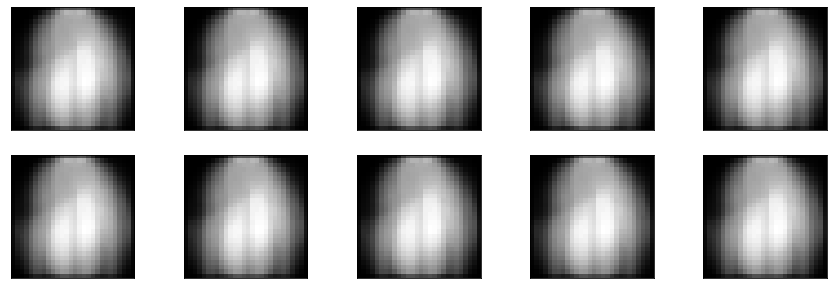

In [16]:
fig = plt.figure(figsize=(15,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(out[i].squeeze().cpu().detach(), cmap='gray')
    #ax.set_title(data[1][i].item())

In [8]:
inp = test_data[0].to(device)
encoded = trainer.model.encode(inp)

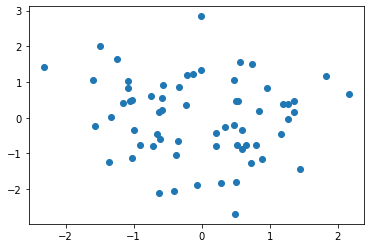

In [12]:
encoded = encoded.detach().cpu()
plt.scatter(encoded[:,0], encoded[:,1])

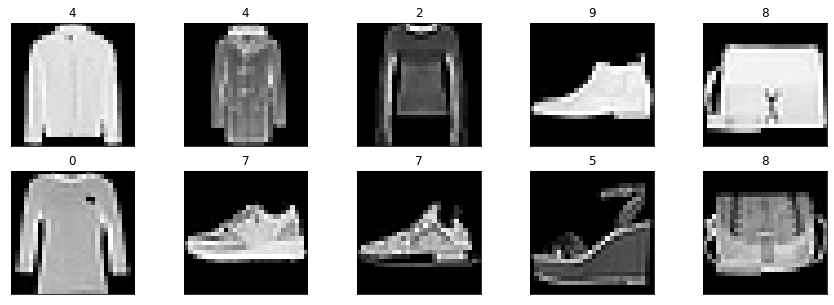

In [ ]:
fig = plt.figure(figsize=(15,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(data[0][i].squeeze(), cmap='gray')
    ax.set_title(data[1][i].item())

In [ ]:
vae = model.CAE(device)
vae = vae.to(device)
opt = optim.Adam(vae.parameters())

In [19]:
pred = torch.nn.functional.sigmoid(torch.randn(64, 1, 28, 28))
true = torch.nn.functional.sigmoid(torch.randn(64,1,28,28))
bce = torch.nn.functional.binary_cross_entropy(pred, true, reduction='sum')

/apps/gilbreth/ml/ml-toolkit/conda-2020.11-py38/gpu/install/pytorch-1.7.1/lib/python3.8/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [30]:
mu = torch.randn(64, 100)
log_var = torch.randn(64, 100)
kld = -0.5*torch.sum(1 + log_var - mu**2 - log_var.exp())


In [31]:
kld

tensor(5184.4990)

In [20]:
bce

tensor(40390.6484)

In [ ]:
VAE_loss_fn(out, input)

In [ ]:
def loss_fn(out, input):
    pred, mu, sigma = out
    reg_loss = 1 + torch.log(1.0e-6+sigma**2) - mu**2 - sigma**2
    reg_loss = -0.5 * torch.sum(reg_loss,dim=1)
    reg_loss = torch.mean(reg_loss)
    
    # Reconstruction Loss...!
    recon_loss = torch.nn.functional.binary_cross_entropy(pred, input)

    loss = 0.5*(reg_loss + recon_loss)
    return loss

ModuleAttributeError: 'CAE' object has no attribute 'get_device'

In [ ]:

filename='autencoder_loss_history.pickle'
with open(os.path.join(results_dir, filename),'wb') as f:
    pickle.dump(error, f)

In [ ]:
ret

[4.489895343780518,
 2.1695728302001953,
 1.673727035522461,
 1.3303840160369873,
 1.1398285627365112,
 0.9817180037498474,
 0.839339017868042,
 0.7256714105606079,
 0.654967725276947,
 0.584017276763916,
 0.535712480545044,
 0.46990227699279785,
 0.42232972383499146,
 0.3876922130584717,
 0.35516148805618286,
 0.34537607431411743,
 0.32991668581962585,
 0.32043999433517456,
 0.3257615566253662,
 0.3282080292701721,
 0.35435211658477783,
 0.38397008180618286,
 0.3729363679885864,
 0.36150050163269043,
 0.37699538469314575,
 0.38033682107925415,
 0.3775314688682556,
 0.3416006565093994,
 0.3515528440475464,
 0.3381272554397583,
 0.3570514917373657,
 0.32372960448265076,
 0.3325730860233307,
 0.3168538212776184,
 0.3189243972301483,
 0.2961244285106659,
 0.3053605258464813,
 0.3081442415714264,
 0.325437068939209,
 0.30555883049964905,
 0.3061442971229553,
 0.3147801160812378,
 0.30778205394744873,
 0.3046737611293793,
 0.2958954870700836,
 0.2927684187889099,
 0.30042028427124023,
 0.29

In [ ]:
with torch.no_grad():
    out = vae(data[0])

torch.Size([64, 16, 7, 7])
torch.Size([64, 784])
torch.Size([64, 2])
torch.Size([64, 784])
torch.Size([64, 16, 7, 7])


In [ ]:
sigma[0:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [ ]:
data[0][0,0,8:15,8:15]

tensor([[0.0011, 0.0012, 0.0014, 0.0015, 0.0013, 0.0012, 0.0011],
        [0.0009, 0.0011, 0.0013, 0.0013, 0.0012, 0.0013, 0.0013],
        [0.0012, 0.0012, 0.0013, 0.0014, 0.0013, 0.0013, 0.0013],
        [0.0012, 0.0012, 0.0012, 0.0012, 0.0011, 0.0014, 0.0014],
        [0.0014, 0.0014, 0.0013, 0.0014, 0.0015, 0.0015, 0.0015],
        [0.0012, 0.0011, 0.0008, 0.0008, 0.0009, 0.0005, 0.0005],
        [0.0009, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0008]])

In [ ]:
torch.nn.functional.binary_cross_entropy(pred, data[0])


tensor(0.7463)

In [ ]:
pred[0,0,8:15,8:15]
# pred.shape

tensor([[0.5133, 0.5299, 0.5116, 0.5535, 0.5173, 0.5356, 0.5269],
        [0.5110, 0.5433, 0.5028, 0.5370, 0.5091, 0.5304, 0.5107],
        [0.5167, 0.5373, 0.5194, 0.5342, 0.5168, 0.5367, 0.5144],
        [0.5134, 0.5289, 0.5173, 0.5357, 0.5189, 0.5191, 0.5242],
        [0.5205, 0.5107, 0.5277, 0.5457, 0.5158, 0.5235, 0.5127],
        [0.5218, 0.5353, 0.5174, 0.5136, 0.5102, 0.5431, 0.5162],
        [0.5200, 0.5115, 0.5375, 0.5331, 0.5123, 0.5389, 0.5232]])

In [ ]:
def loss(out):



SyntaxError: unexpected EOF while parsing (1340066460.py, line 2)

In [ ]:
plt.scatter(out[:,0], out[:,1])
plt.xlim([-1,1])
plt.ylim([-1,1])

TypeError: tuple indices must be integers or slices, not tuple